<a href="https://colab.research.google.com/github/gabrielcgo/modulo03/blob/main/modulo03_projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [227]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [62]:
dados = pd.read_csv('Employee.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
dados.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [211]:
dados = dados.replace({'Attrition': {'Yes': 1, 'No': 0}, 'Gender': {'Male': 1, 'Female': 0}, 'Department': {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3},
                       'EducationField': {'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3, 'Medical': 4, 'Other': 5, 'Technical Degree': 6}})
dados.rename(columns = {'Attrition':'turnover'}, inplace = True)

In [66]:
dados.isnull().sum()

Age                         0
turnover                    0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exercício 01

Analisar se o tempo de trabalho vs a sua valorização pode afetar no desgaste do funcionário, para isso, serão selecionadas variáveis que condizem com o objetivo da análise

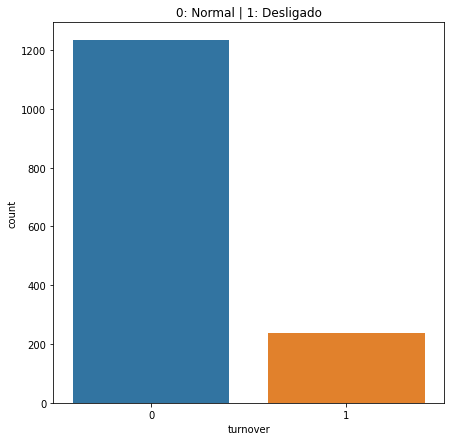

In [184]:
# Vamos visualizar primeiro a quantidade de funcionários desligados...

plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('0: Normal | 1: Desligado') # Título
sns.countplot(data=dados, x ='turnover')

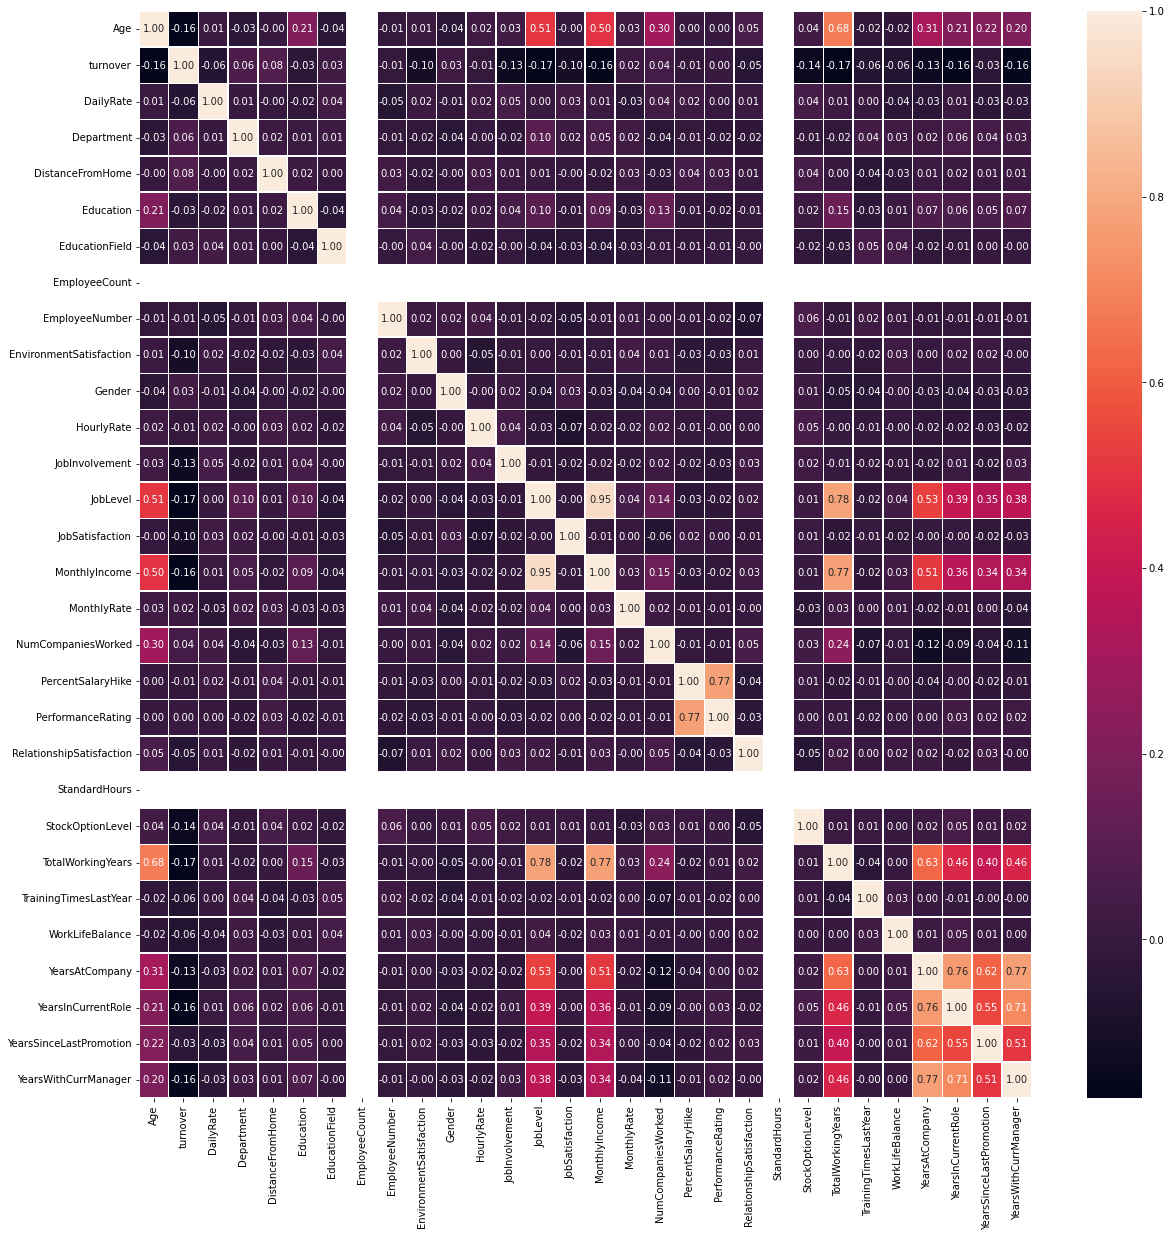

In [212]:
# Agora vamos ver se existem algumas correlações
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dados.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

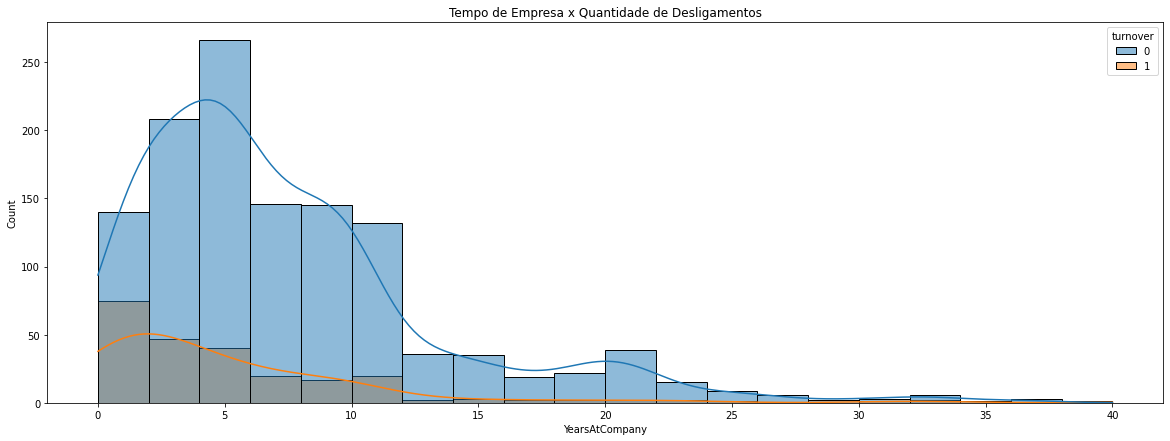

In [209]:
# Agora vamos visualizar a rotatividade por tempo de empresa, o que pode pode nos trazer algumas revelações...

plt.figure(figsize=(20, 7))
plt.title('Tempo de Empresa x Quantidade de Desligamentos')
sns.histplot(data=dados, x='YearsAtCompany', hue='turnover', bins=20, kde=True)

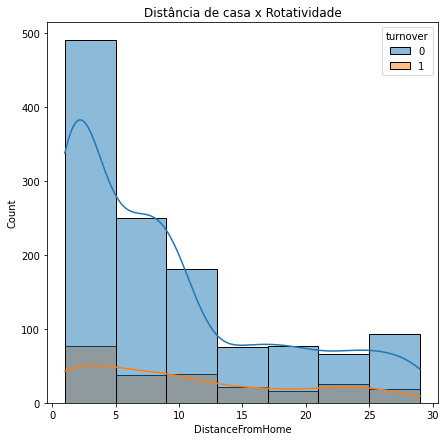

In [199]:
# A distância da casa pode influenciar também, vamos ver...

plt.figure(figsize=(7, 7))
plt.title('Distância de casa x Rotatividade')
sns.histplot(data=dados, x='DistanceFromHome', hue='turnover', kde=True, bins=7)

# Exercício 02

As variáveis de maior peso puderam ser observadas pelo mapa de calor, sendo selecionadas as que causavam maior casualidade com a variável 'turnover'. Além disso, algumas variáveis foram analisadas individualmente para entender qual o comportamento e a relação com a variavel target.
Assim cheguei as seguintes 8 variáveis de maior importância: Age, Department, DistanceFromHome, YearsAtCompany, JobLevel, MonthlyIncome, StockOptionLevel e TotalWorkingYears.

Sendo Age, DistanceFromHome e YearsAtCompany as que eu demonstrei no exercício 1.

In [277]:
# Age, Department, DistanceFromHome, YearsAtCompany, JobLevel, MonthlyIncome, StockOptionLevel, TotalWorkingYears

#Age, DistanceFromHome, YearsAtCompany

df = dados[['turnover', 'Age', 'Department', 'DistanceFromHome', 'Gender', 'YearsAtCompany', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears']]
df.head()

,turnover,Age,Department,DistanceFromHome,Gender,YearsAtCompany,MonthlyIncome,StockOptionLevel,TotalWorkingYears
0,1,41,3,1,0,6,5993,0,8
1,0,49,2,8,1,10,5130,1,10
2,1,37,2,2,1,0,2090,0,7
3,0,33,2,3,0,8,2909,0,8
4,0,27,2,2,1,2,3468,1,6


# Exercício 03

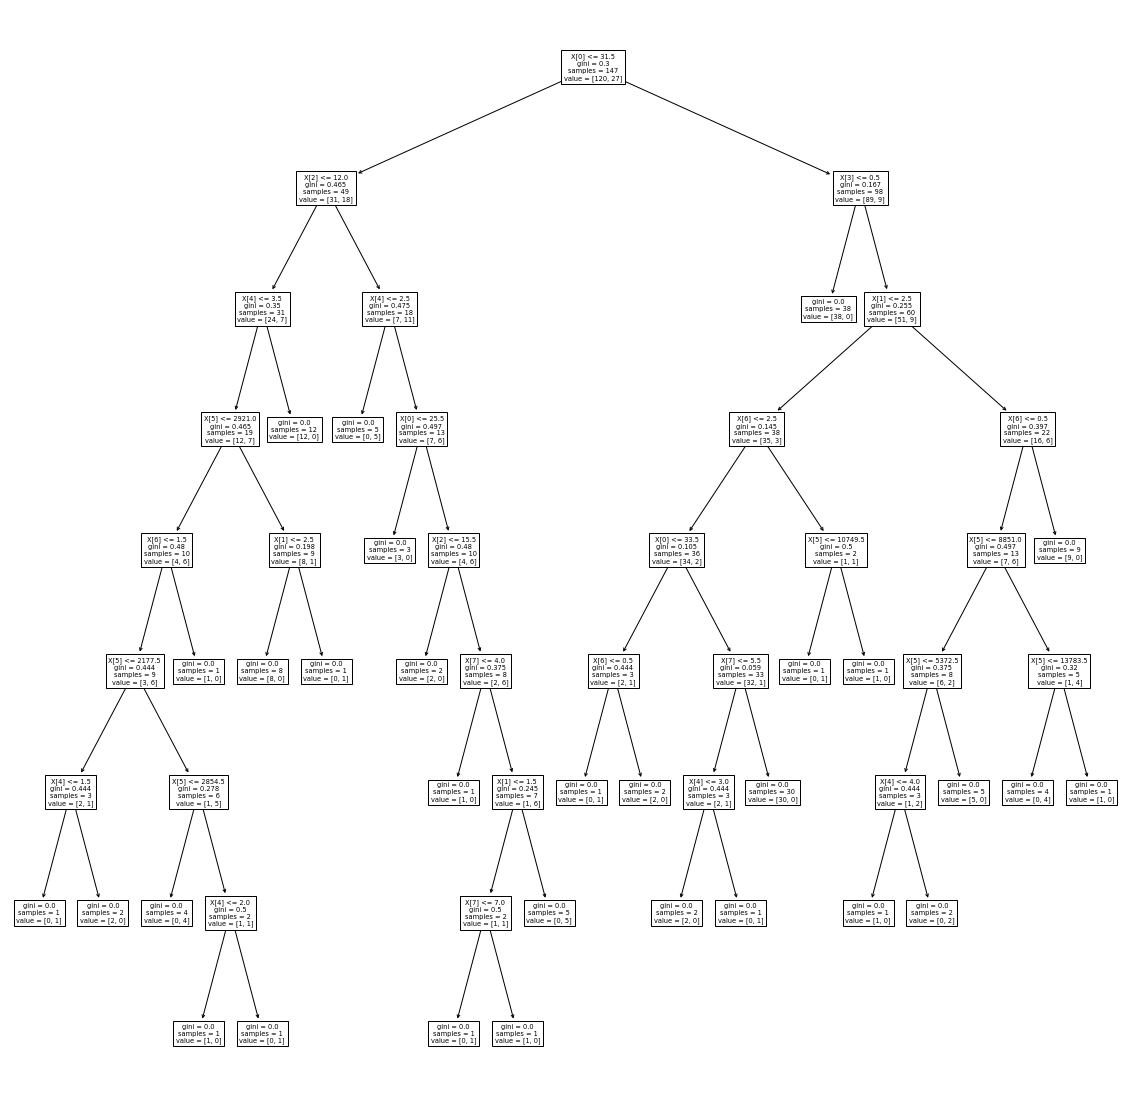

In [278]:
X = df.drop(['turnover'], axis=1)
y = df['turnover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

plt.figure(figsize = [20,20])
plot_tree(dt)
plt.show()

In [279]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

0.780045351473923
0.601622238847108
0.6104222821203953


# Exercício 04

O Índice/Impureza de Gini, calcula probabilidade de que uma variável seja classificada incorretamente quando selecionada aleatoriamente. Se todos os elementos estiverem vinculados a uma única class, ela poderá ser chamada de pura. Varia de 0 à 1, sendo 0 a pureza e 1 a distribuição aleatória. Quando em 0.5, significa uma distribuição igualitária.
A vantagem é que facilita as distribuições maiores e opera nas variáveis target ​​categóricas em termos de “sucesso” ou “fracasso”. Porém não é adequada para distribuições menores e pequenas mudanças no dataset podem causar grandes alterações na árvore final.

# Exercício 05

O modelo que tem maior chance de overfitting, entre Random Forest e o AdaBoost, seria o segundo, pois por ele se ajustar iterativamente para se concentrar em áreas nas quais ela prevê incorretamente, pode acabar gerando o overfitting por querer se ajustar demais ao modelo e aumentar muito a acurácia.

# Exercício 06

Não recomendaria, pois apesar da Acurácia atingir 78%, a sensibilidade e a precisão ficaram com resultados baixos (61% e 60% respectivamente), isso significa que o modelo pode fazer previsões incorretas sobre a probabilidade de rotatividade do funcionário. Por exemplo, pelos dados não estarem balanceados, poderíamos acabar predizendo que a idade seira um peso fundamental para a chance do funcionário sair da empresa e isso influenciar na contratação.

Vale notar que um modelo com 100% de acurácia é tecnicamente impossível... a explicação são algumas como:
1. Somente se nosso modelo for extremante simples e previsível.
2. Nunca teremos todos os dados do mundo para o nosso modelo prever 100%.
3. A previsão poderia ficar tão ajustada ao modelo que ao colocarmos novos dados, basicamente ele não saberia trabalhar com os mesmos, dando resultados errados.